# 1. Data

In [ ]:
pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import libraries
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as si


### a. Select one major cryptocurrency with the two-year period.

In [ ]:
# get ctyptocurrencies data
dogecoin = yf.Ticker("DOGE-USD")

In [ ]:
# See dogecoin.info
dogecoin.info

{'companyOfficers': [],
 'twitter': '"https://twitter.com/dogecoin"',
 'name': 'Dogecoin',
 'startDate': 1387065600,
 'description': 'Dogecoin (DOGE) is a cryptocurrency . Users are able to generate DOGE through the process of mining. Dogecoin has a current supply of 132,670,764,299.89409. The last known price of Dogecoin is 0.10413785 USD and is up 2.13 over the last 24 hours. It is currently trading on 608 active market(s) with $728,432,802.75 traded over the last 24 hours. More information can be found at http://dogecoin.com/.',
 'maxAge': 1,
 'exchange': 'CCC',
 'shortName': 'Dogecoin USD',
 'exchangeTimezoneName': 'UTC',
 'exchangeTimezoneShortName': 'UTC',
 'isEsgPopulated': False,
 'gmtOffSetMilliseconds': '0',
 'quoteType': 'CRYPTOCURRENCY',
 'symbol': 'DOGE-USD',
 'messageBoardId': 'finmb_DOGE_CCC',
 'market': 'ccc_market',
 'previousClose': 0.10408018,
 'regularMarketOpen': 0.10408018,
 'twoHundredDayAverage': 0.07307178,
 'trailingAnnualDividendYield': None,
 'payoutRatio': 

### 2. Use python to download its historical daily data via Yahoo Finance.

In [ ]:
# get dogecoin historical market data
df = dogecoin.history(period="2y", start="2020-11-01", end="2022-11-01")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-11-01 00:00:00+00:00,0.002576,0.002590,0.002561,0.002582,45528682,0,0
2020-11-02 00:00:00+00:00,0.002582,0.002592,0.002515,0.002517,50142376,0,0
2020-11-03 00:00:00+00:00,0.002517,0.002530,0.002452,0.002528,62871653,0,0
2020-11-04 00:00:00+00:00,0.002528,0.002558,0.002497,0.002533,52552651,0,0
2020-11-05 00:00:00+00:00,0.002533,0.002639,0.002496,0.002617,31611963,0,0


In [ ]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-10-27 00:00:00+00:00,0.072799,0.084825,0.072033,0.077018,2652784687,0,0
2022-10-28 00:00:00+00:00,0.077028,0.087901,0.072930,0.083897,3172500998,0,0
2022-10-29 00:00:00+00:00,0.083933,0.149392,0.083387,0.121603,12157642295,0,0
2022-10-30 00:00:00+00:00,0.121644,0.141657,0.112892,0.117802,7908593943,0,0
2022-10-31 00:00:00+00:00,0.117752,0.130245,0.115076,0.127026,5814247122,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2020-11-01 00:00:00+00:00 to 2022-10-31 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          730 non-null    float64
 1   High          730 non-null    float64
 2   Low           730 non-null    float64
 3   Close         730 non-null    float64
 4   Volume        730 non-null    int64  
 5   Dividends     730 non-null    int64  
 6   Stock Splits  730 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 61.8 KB


### 3. Plot the movement (shape) of the cryptocurrency over this time period and calculate its annualised volatility.

Text(0.5, 1.0, 'Closed price')

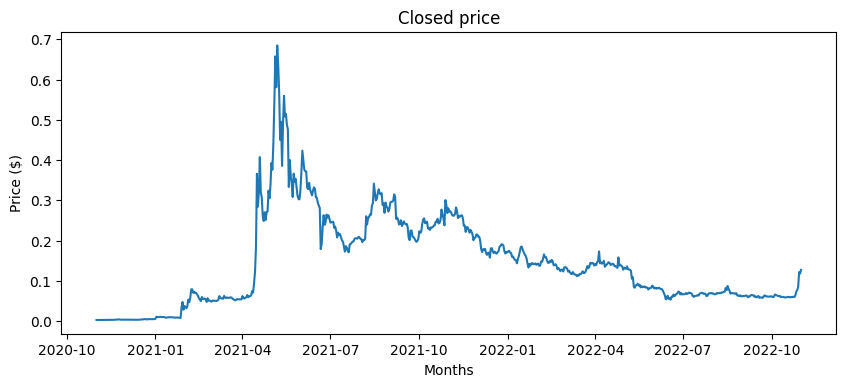

In [ ]:
# Plot the movement 
plt.figure(figsize=(10, 4), dpi=100)
plt.plot(df['Close'])
plt.xlabel("Months")
plt.ylabel("Price ($)")
plt.title("Closed price")

In [ ]:
data = df[['Close']]
data.head(5)

,Close
Date,
2020-11-01 00:00:00+00:00,0.002582
2020-11-02 00:00:00+00:00,0.002517
2020-11-03 00:00:00+00:00,0.002528
2020-11-04 00:00:00+00:00,0.002533
2020-11-05 00:00:00+00:00,0.002617


In [ ]:
data.diff().head()

,Close
Date,
2020-11-01 00:00:00+00:00,NaN
2020-11-02 00:00:00+00:00,-0.000065
2020-11-03 00:00:00+00:00,0.000011
2020-11-04 00:00:00+00:00,0.000005
2020-11-05 00:00:00+00:00,0.000084


In [ ]:
data.diff().describe().round(2)

,Close
count,729.00
mean,0.00
std,0.02
min,-0.14
25%,-0.00
50%,-0.00
75%,0.00
max,0.18


In [ ]:
data.pct_change().round(4).head()

,Close
Date,
2020-11-01 00:00:00+00:00,NaN
2020-11-02 00:00:00+00:00,-0.0252
2020-11-03 00:00:00+00:00,0.0044
2020-11-04 00:00:00+00:00,0.0020
2020-11-05 00:00:00+00:00,0.0332


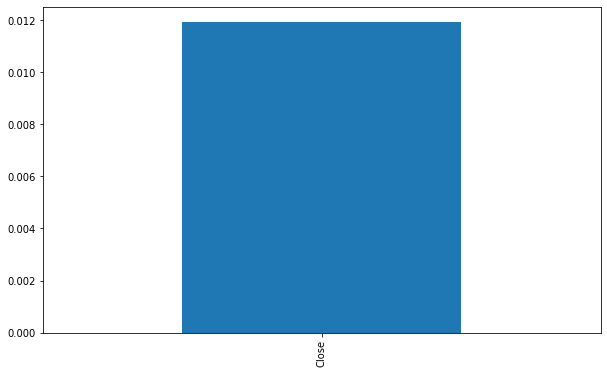

In [ ]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

In [ ]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,Close
Date,
2020-11-01 00:00:00+00:00,NaN
2020-11-02 00:00:00+00:00,-0.0255
2020-11-03 00:00:00+00:00,0.0044
2020-11-04 00:00:00+00:00,0.0020
2020-11-05 00:00:00+00:00,0.0326


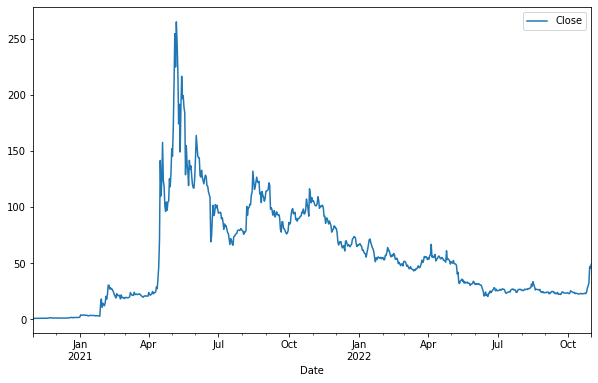

In [ ]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

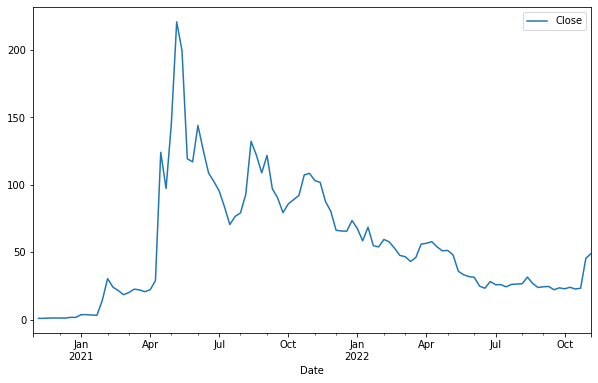

In [ ]:
rets.cumsum().apply(np.exp).resample('1w', label='right').last().plot(figsize=(10, 6))

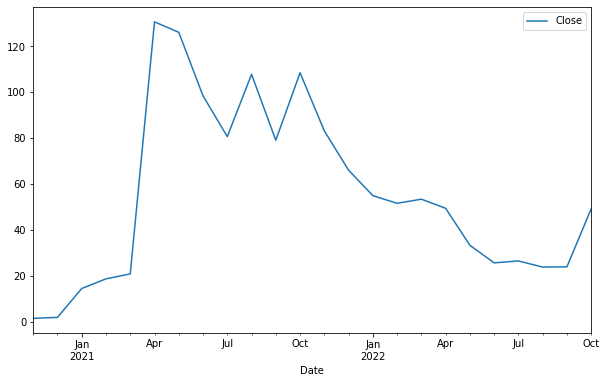

In [ ]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

In [ ]:
# Conveniently, Pandas has the pct_change method to calculate the percentage of changes in the daily returns. Let’s use it and store it in a new column “daily_returns”.
# Let’s start with dogecoin:
df['daily_returns']=(df['Close'].pct_change())*100

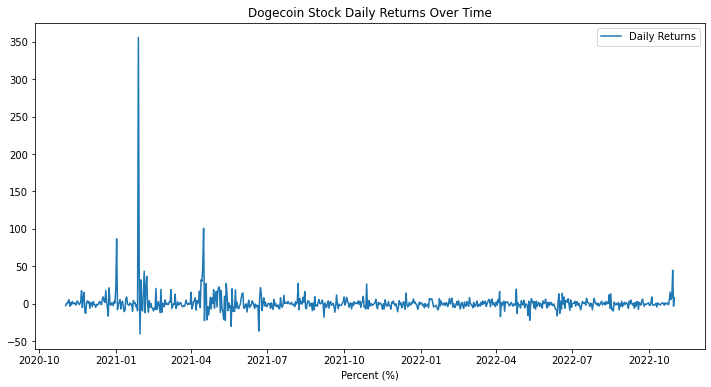

In [ ]:
df.dropna(inplace=True)
fig,ax=plt.subplots(figsize=(12,6))
plt.plot(df['daily_returns'], label = 'Daily Returns')
plt.legend(loc='best')
plt.xlabel("Months")
plt.xlabel("Percent (%)")
plt.title('Dogecoin Stock Daily Returns Over Time')
plt.show()

In [ ]:
# Calculate the daily, monthly, and annually volatility of a stock
import math
daily_volatility = df['daily_returns'].std()
print('Daily volatility:')
print('Dogecoin: ', '{:.2f}%\n'.format(daily_volatility))

monthly_volatility = math.sqrt(21) * daily_volatility
print('Monthly volatility:')
print ('Dogecoin: ', '{:.2f}%\n'.format(monthly_volatility))

annual_volatility = math.sqrt(252) * daily_volatility
print('Annual volatility:')
print ('Dogecoin: ', '{:.2f}%\n'.format(annual_volatility))

Daily volatility:
Dogecoin:  16.12%

Monthly volatility:
Dogecoin:  73.87%

Annual volatility:
Dogecoin:  255.88%



In [ ]:
volatility = annual_volatility/100

# 2. Methodology

### a. Design a derivative and its associated pricing value using at least two methods which must be different. 
### Hints: Derivative can be any type, such as vanilla option, binary option etc.

#### * Black-Scholes Model


In [ ]:
def black_scholes_model(S, K, T, r, sigma, payoff='call'):
    '''
    S: current stock price
    K: strike price
    T: time to maturity
    r: risk-free interest rate
    sigma: volatility
    payoff: call or put
    '''
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S/K) + (r - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    if payoff == 'call':
        return (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    elif payoff == 'put':
        return (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
    else:
        print('Error: Payoff type not recognized')


#### * Monte Carlo Simulation

In [ ]:
def monte_carlo_simulation(S, K, T, r, sigma, payoff='call', n=100000):
    '''
    S: current stock price
    K: strike price
    T: time to maturity
    r: risk-free interest rate
    sigma: volatility
    payoff: call or put
    n: number of simulations
    '''
    # Generate random numbers
    Z = np.random.standard_normal(n)
    # Calculate the stock price at maturity
    ST = S * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    # Calculate the payoff
    if payoff == 'call':
        payoff = np.maximum(ST - K, 0)
    elif payoff == 'put':
        payoff = np.maximum(K - ST, 0)
    else:
        print('Error: Payoff type not recognized')
    # Calculate the Monte Carlo estimate
    C0 = np.exp(-r * T) * np.sum(payoff) / n
    return C0

#### b. You need to compare the results from these methods, such as Binomial, BSM and MC simulation etc. 

In [ ]:
# Compute the option value using the Black-Scholes model and Monte Carlo simulation
S = df['Close'][-1]
K = 100
T = 1
r = 0.1
q = 0
vol = volatility
payoff = "call"
n = 100000

bsm_value = black_scholes_model(S, K, T, r, vol, payoff)
mcs_value = monte_carlo_simulation(S, K, T, r, vol, payoff, n)

print("The option value using the Black-Scholes model is: ", bsm_value)
print("The option value using the Monte Carlo simulation is: ", mcs_value)

The option value using the Black-Scholes model is:  0.0071456214198630415
The option value using the Monte Carlo simulation is:  0.006943901141953096


# 3. Analysis

#### a. Calculate and explain its Greeks for the risk management purpose. Hints: you need to provide at least five Greeks

In [ ]:
# Calculation and Use of Option Price Partial Derivatives
def delta(S, K, T, r, sigma, payoff='call'):
    '''
    S: current stock price
    K: strike price
    T: time to maturity
    r: risk-free interest rate
    sigma: volatility
    payoff: call or put
    '''
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    if payoff == 'call':
        return si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == 'put':
        return si.norm.cdf(d1, 0.0, 1.0) - 1
    else:
        print('Error: Payoff type not recognized')

def gamma(S, K, T, r, sigma):
    '''
    S: current stock price
    K: strike price
    T: time to maturity
    r: risk-free interest rate
    sigma: volatility
    '''
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return si.norm.pdf(d1, 0.0, 1.0) / (S * sigma * np.sqrt(T))

def vega(S, K, T, r, sigma):
    '''
    S: current stock price
    K: strike price
    T: time to maturity
    r: risk-free interest rate
    sigma: volatility
    '''
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return S * si.norm.pdf(d1, 0.0, 1.0) * np.sqrt(T)

def theta(S, K, T, r, sigma, payoff='call'):
    '''
    S: current stock price
    K: strike price
    T: time to maturity
    r: risk-free interest rate
    sigma: volatility
    payoff: call or put
    '''
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S/K) + (r - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    if payoff == 'call':
        return -S * si.norm.pdf(d1, 0.0, 1.0) * sigma / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == 'put':
        return -S * si.norm.pdf(d1, 0.0, 1.0) * sigma / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    else:
        print('Error: Payoff type not recognized')

def rho(S, K, T, r, sigma, payoff='call'):
    '''
    S: current stock price
    K: strike price
    T: time to maturity
    r: risk-free interest rate
    sigma: volatility
    payoff: call or put
    '''
    d2 = (np.log(S/K) + (r - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    if payoff == 'call':
        return K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == 'put':
        return -K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    else:
        print('Error: Payoff type not recognized')

# Compute the option price partial derivatives
S = df['Close'][-1]
K = 100
T = 1
r = 0.05
q = 0
vol = volatility
payoff = "call"

delta = delta(S, K, T, r, vol, payoff)
gamma = gamma(S, K, T, r, vol)
vega = vega(S, K, T, r, vol)
theta = theta(S, K, T, r, vol, payoff)
rho = rho(S, K, T, r, vol, payoff)

print("The option delta is: ", delta)
print("The option gamma is: ", gamma)
print("The option vega is: ", vega)
print("The option theta is: ", theta)
print("The option rho is: ", rho)

The option delta is:  0.09557973774209139
The option gamma is:  0.5223339348681754
The option vega is:  0.02156612730055022
The option theta is:  -0.027854978870603387
The option rho is:  0.005262601714806838


In [ ]:
# Calculation and Use of Option Price Greeks
def greeks(S, K, T, r, sigma, payoff='call'):
    '''
    S: current stock price
    K: strike price
    T: time to maturity
    r: risk-free interest rate
    sigma: volatility
    payoff: call or put
    '''
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S/K) + (r - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    if payoff == 'call':
        delta = si.norm.cdf(d1, 0.0, 1.0)
        gamma = si.norm.pdf(d1, 0.0, 1.0) / (S * sigma * np.sqrt(T))
        vega = S * si.norm.pdf(d1, 0.0, 1.0) * np.sqrt(T)
        theta = -S * si.norm.pdf(d1, 0.0, 1.0) * sigma / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
        rho = K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == 'put':
        delta = si.norm.cdf(d1, 0.0, 1.0) - 1
        gamma = si.norm.pdf(d1, 0.0, 1.0) / (S * sigma * np.sqrt(T))
        vega = S * si.norm.pdf(d1, 0.0, 1.0) * np.sqrt(T)
        theta = -S * si.norm.pdf(d1, 0.0, 1.0) * sigma / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
        rho = -K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    else:
        print('Error: Payoff type not recognized')
    return delta, gamma, vega, theta, rho

# Compute the option price partial derivatives
S = df['Close'][-1]
K = 100
T = 1
r = 0.05
q = 0
vol = volatility
payoff = "call"

delta, gamma, vega, theta, rho = greeks(S, K, T, r, vol, payoff)

print("The option delta is: ", delta)
print("The option gamma is: ", gamma)
print("The option vega is: ", vega)
print("The option theta is: ", theta)
print("The option rho is: ", rho)

The option delta is:  0.09557973774209139
The option gamma is:  0.5223339348681754
The option vega is:  0.02156612730055022
The option theta is:  -0.027854978870603387
The option rho is:  0.005262601714806838


#### Delta

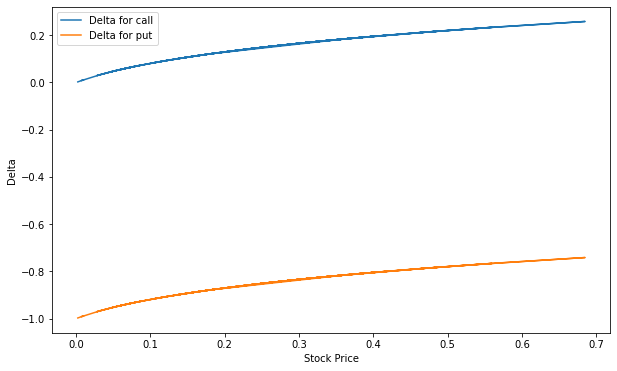

In [ ]:
# Delta plot for a different payoff
S = df['Close']
K = 100
T = 1
r = 0.05
q = 0
vol = volatility

delta_call = []
delta_put = []

for i in range(len(S)):
    delta_call.append(greeks(S[i], K, T, r, vol, 'call')[0])
    delta_put.append(greeks(S[i], K, T, r, vol, 'put')[0])

plt.figure(figsize=(10, 6))
plt.plot(S, delta_call, label='Delta for call')
plt.plot(S, delta_put, label='Delta for put')
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.legend()
plt.show()

#### Gamma

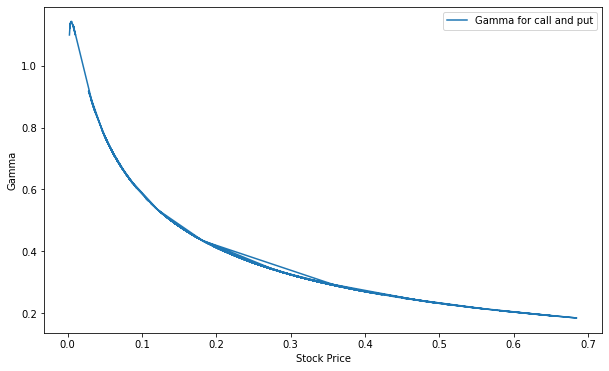

In [ ]:
# Gamma plot for a different payoff
S = df['Close']
K = 100
T = 1
r = 0.05
q = 0
vol = volatility

gamma_call = []
gamma_put = []

for i in range(len(S)):
    gamma_call.append(greeks(S[i], K, T, r, vol, 'call')[1])
    gamma_put.append(greeks(S[i], K, T, r, vol, 'put')[1])

plt.figure(figsize=(10, 6))
plt.plot(S, gamma_call, label='Gamma for call and put')
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.legend()
plt.show()


#### Vega

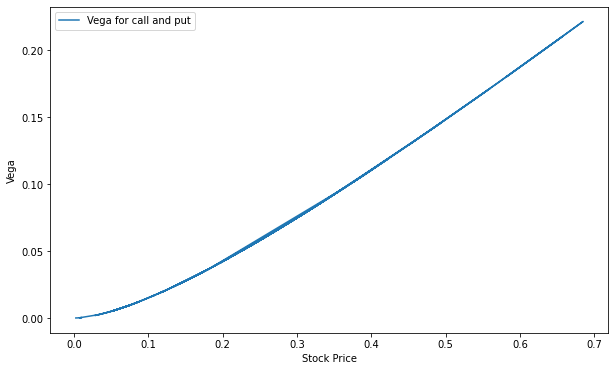

In [ ]:
# Vega plot for a different payoff
S = df['Close']
K = 100
T = 1
r = 0.05
q = 0
vol = volatility

vega_call = []
vega_put = []

for i in range(len(S)):
    vega_call.append(greeks(S[i], K, T, r, vol, 'call')[2])
    vega_put.append(greeks(S[i], K, T, r, vol, 'put')[2])

plt.figure(figsize=(10, 6))
plt.plot(S, vega_call, label='Vega for call and put')
plt.xlabel('Stock Price')
plt.ylabel('Vega')
plt.legend()
plt.show()


#### Theta

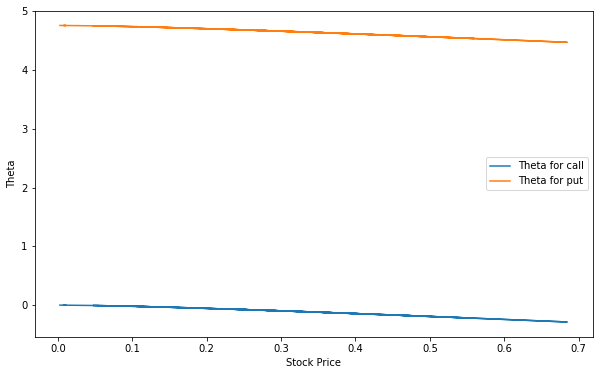

In [ ]:
# Theta plot for a different payoff
S = df['Close']
K = 100
T = 1
r = 0.05
q = 0
vol = volatility

theta_call = []
theta_put = []

for i in range(len(S)):
    theta_call.append(greeks(S[i], K, T, r, vol, 'call')[3])
    theta_put.append(greeks(S[i], K, T, r, vol, 'put')[3])

plt.figure(figsize=(10, 6))
plt.plot(S, theta_call, label='Theta for call')
plt.plot(S, theta_put, label='Theta for put')
plt.xlabel('Stock Price')
plt.ylabel('Theta')
plt.legend()
plt.show()

#### Rho

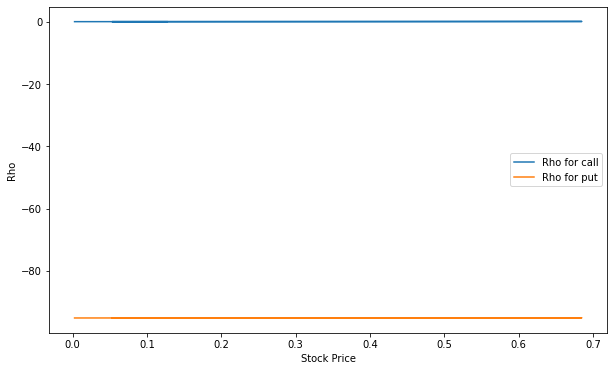

In [ ]:
# Rho plot for a different payoff
S = df['Close']
K = 100
T = 1
r = 0.05
q = 0
vol = volatility

rho_call = []
rho_put = []

for i in range(len(S)):
    rho_call.append(greeks(S[i], K, T, r, vol, 'call')[4])
    rho_put.append(greeks(S[i], K, T, r, vol, 'put')[4])

plt.figure(figsize=(10, 6))
plt.plot(S, rho_call, label='Rho for call')
plt.plot(S, rho_put, label='Rho for put')
plt.xlabel('Stock Price')
plt.ylabel('Rho')
plt.legend()
plt.show()
